In [116]:
import numpy as np
import math
import matplotlib.pyplot as plt
from random import choices
from random import sample
import warnings
warnings.filterwarnings('ignore')
# w = np.array([0.1, 0.1, 0.4, 0.2, 0.2])
w = np.array([0.612903, 0.387097])
Gamma_w = np.array([[0.6842, 0.2211, 0.0316, 0.0368, 0.0263], [0.0917, 0.1916, 0.05, 0.2, 0.4667]])
Gamma_s = np.array([[0.125, 0.25, 0.2368, 0.3356, 0.0526], [0.1562, 0.2188, 0.25, 0.3021, 0.0729]])
# Gamma_w = np.array([[0.62, 0.22, 0.1, 0.04, 0.02], 
#           [0.28, 0.63, 0.09, 0.01, 0.01],
#           [0.05, 0.16, 0.58, 0.14, 0.07],
#           [0.02, 0.06, 0.15, 0.61, 0.16],
#           [0.01, 0.06, 0.02, 0.27, 0.64]])
# Gamma_s = np.array([[0.34, 0.26, 0.26, 0.08, 0.06], 
#                             [0.24, 0.33, 0.27, 0.11, 0.05],
#                             [0.1, 0.24, 0.28, 0.26, 0.12],
#                             [0.06, 0.13, 0.28, 0.3, 0.23],
#                             [0.1, 0.07, 0.21, 0.29, 0.33]])

In [5]:
class Crowdsourcing:
    def __init__(self, w, Gamma_w, Gamma_s, 
                       e = 1,
                       m = 100, 
                       n0 = 10, 
                       mi = 30, 
                       prior_e = [0.2, 0.8, 0], 
                       signal = [1,2,3,4,5]):
        self.m = m # Total number of tasks
        self.n0 = n0 # Minimum number of agents that are assigned to each task
        self.mi = mi # Number of tasks that each agent answers
        self.prior_e = prior_e # Prior of three types of agents: shirker, rational worker, honest worker
        self.signal = signal # Signal space
        self.S = len(signal)
        self.w = w # Prior of ground truth
        self.Gamma_w = Gamma_w #Confusion matrix of full effort worker
        self.Gamma_s = Gamma_s #Confusion matrix of shirker
        self.e = e #Effort level of rational agents

def Report_Generator(para):
    m = para.m
    n0 = para.n0
    mi = para.mi
    prior_e = para.prior_e
    w = para.w
    e = para.e
    Gamma_w = para.Gamma_w
    Gamma_s = para.Gamma_s
    signal = para.signal
    n = math.ceil(m*n0/(mi - 1))
    
    agent = np.arange(len(prior_e))
    agent_e = choices(agent, prior_e, k = n)
    Y = choices(list(range(1, len(w)+1)), w, k = m)
    
    flag = 0
    while flag < m:
        flag = 0
        current_task = np.zeros(n)
        R = np.zeros((n, m))
        for j, y in enumerate(Y):
            if len(list(np.where(current_task < mi)[0])) < n0:
                break
            else:
                flag += 1
            random_agents = np.array(sample(list(np.where(current_task < mi)[0]), n0))
            for i, index in enumerate(random_agents):
                if agent_e[index] == 0:
                    Gamma_i = Gamma_s
                elif agent_e[index] == 1:
                    Gamma_i = e*Gamma_w + (1-e)*Gamma_s
                elif agent_e[index] == 2:
                    Gamma_i = Gamma_w
                R[index,j] = choices(signal, Gamma_i[Y[j]-1])[0]
            current_task[random_agents] += 1
    
    agent_i = np.where(np.count_nonzero(R, axis = 1) < mi)[0]
    for i in agent_i:
        if agent_e[index] == 0:
            Gamma_i = Gamma_s
        elif agent_e[index] == 1:
            Gamma_i = e*Gamma_w + (1-e)*Gamma_s
        elif agent_e[index] == 2:
            Gamma_i = Gamma_w
        more_tasks = sample(list(np.where(R[i] == 0)[0]), mi - np.count_nonzero(R[i]))
        for j in more_tasks:
            R[i,j] = choices(signal, Gamma_i[Y[j]-1])[0]

    
    return (R, Y, np.array(agent_e))


def Report_Generator_2(para, E, n_E):
    m = para.m
    n0 = para.n0
    mi = para.mi
    w = para.w
    e = para.e
    Gamma_w = para.Gamma_w
    Gamma_s = para.Gamma_s
    signal = para.signal
    n = np.sum(n_E)
    
    agent = np.arange(len(E))
    agent_e = np.zeros(n)
    for i in range(len(n_E)-1):
        agent_e[np.sum(np.array(n_E)[0:i+1]):np.sum(np.array(n_E)[0:i+2])] = i+1
    Y = choices(list(range(1, len(w)+1)), w, k = m)
    
    flag = 0
    while flag < m:
        flag = 0
        current_task = np.zeros(n)
        R = np.zeros((n, m))
        for j, y in enumerate(Y):
            if len(list(np.where(current_task < mi)[0])) < n0:
                break
            else:
                flag += 1
            random_agents = np.array(sample(list(np.where(current_task < mi)[0]), n0))
            for i, index in enumerate(random_agents):
                e = E[int(agent_e[index])]
                Gamma_i = e*Gamma_w + (1-e)*Gamma_s
                R[index,j] = choices(signal, Gamma_i[Y[j]-1])[0]
            current_task[random_agents] += 1
    
    agent_i = np.where(np.count_nonzero(R, axis = 1) < mi)[0]
    for i, index in enumerate(agent_i):
        if agent_e[index] == 0:
            Gamma_i = Gamma_s
        elif agent_e[index] == 1:
            Gamma_i = e*Gamma_w + (1-e)*Gamma_s
        elif agent_e[index] == 2:
            Gamma_i = Gamma_w
        more_tasks = sample(list(np.where(R[i] == 0)[0]), mi - np.count_nonzero(R[i]))
        for j in more_tasks:
            R[i,j] = choices(signal, Gamma_i[Y[j]-1])[0]

    
    return (R, Y, np.array(agent_e))

In [6]:
"""
Matrix mechanism
"""


def distribution_estimator(X1, X2, para): #learn empirical distributions from two agents' reports
    S = para.S
    X1 = np.array(X1)
    X2 = np.array(X2)
    P = np.zeros((S,S))
    Q1 = np.zeros(S)
    Q2 = np.zeros(S)
    m = len(X1)
    m1 = np.count_nonzero(X1)
    m2 = np.count_nonzero(X2)
    m12 = np.size(np.intersect1d(np.where(X1 != 0), np.where(X2 != 0)))
    
    for i in range(m):
        if X1[i] != 0 and X2[i] != 0:
            P[int(X1[i])-1][int(X2[i])-1] += 1/m12
        if X1[i] != 0:
            Q1[int(X1[i])-1] += 1/m1
        if X2[i] != 0:
            Q2[int(X2[i])-1] += 1/m2
    
    return P, Q1, Q2

def soft_predictor_learner(X, para):
    S = para.S
    X = np.array(X)
    m = np.size(X, axis = 1)
    P = []
    for j in range(m):
        pj =  np.zeros(S)
        nj = np.count_nonzero(X[:,j])
        if nj != 0:
            for i in range(S):
                pj[i] = np.count_nonzero(X[:,j] == i+1)/nj     
        P.append(pj)
    return np.array(P)

def distribution_learner(report, predictor, para): #another version of distribution_estimator, which takes a report vector and a soft predictor as inputs
    S = para.S
    r = report
    index_i = np.where(r != 0)[0]
    pre = predictor
    P = np.zeros((S,S))
    for j in index_i:
        P[int(r[j])-1]+=pre[j]/len(index_i)
    Q_a = np.zeros(S)
    for j in range(S):
        Q_a[j] = np.count_nonzero(r == j+1)/len(index_i)
    #Q_p = np.sum(pre, axis = 0)/len(pre)
    #Q = Q_p*Q_a.reshape(-1,1)
    return P, Q_a

def MI_computer(P, Q1, Q2, f): #For matrix mechanism, learn different types of mutual information
    Q = Q2*Q1.reshape(-1, 1)
    
    if f == 0:
        MI = np.sum(np.absolute(P - Q))
    elif f == 1:
        t = P*np.log(P/Q)
        nan_ind = np.isnan(t)
        t[nan_ind] = 0 
        MI = np.sum(t)
    elif f == 2:
        t = P*(np.square((Q/P)-1))
        nan_ind = np.isnan(t)
        t[nan_ind] = 0 
        MI = np.sum(t)
    elif f == 3:
        t = P*(np.square(np.sqrt(Q/P)-1))
        nan_ind = np.isnan(t)
        t[nan_ind] = 0 
        MI = np.sum(t)
    elif f == 4:
        t = P*(np.power((Q/P)-1, 4))
        nan_ind = np.isnan(t)
        t[nan_ind] = 0 
        MI = np.sum(t)
    elif f == 5:
        t = P*(np.power((Q/P)-1, 6))
        nan_ind = np.isnan(t)
        t[nan_ind] = 0 
        MI = np.sum(t)
    
    return MI

def mechanism_matrix_fast(X, f, para):
    m = para.m
    X = np.array(X)
    n = np.size(X, axis = 0)
    U = np.zeros(n)
    for i in range(n):
        X_ni = np.vstack((X[0:i], X[i+1:n]))
        Pi = soft_predictor_learner(X_ni, para)
        Q_p = np.sum(Pi, axis = 0)/m
        P, Q_a = distribution_learner(X[i], Pi, para)
        U[i] = MI_computer(P, Q_a, Q_p, f)
    return U

def mechanism_matrix(X):
    X = np.array(X)
    n = np.size(X, axis = 0)
    U = np.zeros((n,4))
    for i in range(n):
        lis = list(range(n))
        lis.remove(i)
        for j in lis:
            P, Q1, Q2 = distribution_estimator(X[i], X[j], para)
            U[i] += MI_computer(P, Q1, Q2)/(n-1)
    return U

def mechanism_matrix_gt(X, f, x, para):
    n = np.size(X, axis = 0)
    U = np.zeros(n)
    for i in range(n):
        P, Q1, Q2 = distribution_estimator(X[i], x, para)
        U[i] = MI_computer(P, Q1, Q2, f)
    return U

In [7]:
"""
Determinant mechanism
"""
def distribution_learner_DMI(report, predictor, para):
    S = para.S
    r = report
    index_i = np.where(r != 0)[0]
    pre = predictor
    P = np.zeros((S,S))
    for j in index_i:
        P[int(r[j])-1]+=pre[j]/len(index_i)
    return P

def mechanism_determinant_fast(X, para):
    n = np.size(X, axis = 0)
    mi = np.count_nonzero(X[0])
    U = np.zeros(n)
    for i in range(n):
        X_ni = np.vstack((X[0:i], X[i+1:n]))
        Pi = soft_predictor_learner(X_ni, para)
        Xi_1 = X[i].copy()
        Xi_1[np.where(X[i] != 0)[0][0:int(mi/2)]] = 0
        Xi_2 = X[i].copy()
        Xi_2[np.where(X[i] != 0)[0][int(mi/2):mi]] = 0
        
        P1 = distribution_learner_DMI(Xi_1, Pi, para)
        P2 = distribution_learner_DMI(Xi_2, Pi, para)
        
        U[i] = np.linalg.det(P1)*np.linalg.det(P2)
    return U

def determinant_computer(X1,X2, para):
    S = para.S
    index = np.intersect1d(np.where(X1 != 0), np.where(X2 != 0))
    m12 = len(index)
    P1 = np.zeros((S,S))
    for j in index[0:int(m12/2)]:
        P1[int(X1[j])-1][int(X2[j])-1] += 1/int(m12/2)
    P2 = np.zeros((S,S))
    for j in index[int(m12/2):m12]:
        P1[int(X1[j])-1][int(X2[j])-1] += 1/(m12-int(m12/2))
    return np.linalg.det(P1)*np.linalg.det(P2)

def mechanism_determinant(X):
    n = np.size(X, axis = 0)
    U = np.zeros(n)
    for i in range(n):
        lis = list(range(n))
        lis.remove(i)
        for j in lis:    
            U[i] += determinant_computer(X[i],X[j], para)/(n-1)
    return U

def mechanism_determinant_gt(X, x, para):
    n = np.size(X, axis = 0)
    U = np.zeros(n)
    for i in range(n):
        U[i] = determinant_computer(X[i], x, para)
    return U

In [125]:
"""
Model functions
"""
def cost(x, a):
    b = 1/(1/(1+np.exp(-a))-1/(1+np.exp(-0.1*a)))
    c = 1 - b/(1+np.exp(-a))
    return np.log((x-c)/(b+c-x))/a

def cost_2(x, a):
    return a*np.log((x+1)/(1-x)) + 0.1

def cost_2_derivative(x, a):
    return 2*a/(1-np.power(x,2))

def accuracy_computer_threshold(R, Y, agent_w):
    R = np.array(R)
    R_w = R[np.where(agent_w == 1)[0]]
    m = np.size(Y)
    Y_tilde = np.zeros(m)
    for j in range(m):
        Rj = R_w[:,j]
        if np.count_nonzero(Rj) > 0:
            counts = np.bincount(np.int_(Rj[np.where(Rj != 0)[0]]))
            Y_tilde[j] = np.argmax(counts)
        else:
            Rj = R[:,j]
            counts = np.bincount(np.int_(Rj[np.where(Rj != 0)[0]]))
            Y_tilde[j] = np.argmax(counts)
    # print(Y, Y_tilde)
    acc = np.count_nonzero(Y_tilde == Y)/m
    return acc

def accuracy_computer_threshold_realdata(R, Y, agent_w):
    R = np.array(R)
    R_w = R[np.where(agent_w == 1)[0]]
    m = np.size(Y)
    Y_tilde = np.zeros(m)
    for j in range(m):
        Rj = R_w[:,j]
        if np.count_nonzero(Rj) > 0:
            counts = np.bincount(np.int_(Rj[np.where(Rj != 0)[0]]))
            if len(counts) < 6:
                counts = np.concatenate((counts,np.zeros(6-len(counts))))
            ct1 = counts[1]+counts[2]
            ct2 = counts[4]+counts[5]
            if ct1 > ct2:
                Y_tilde[j] = 1
            elif ct2 >= ct1:
                Y_tilde[j] = 2
        else:
            Rj = R[:,j]
            counts = np.bincount(np.int_(Rj[np.where(Rj != 0)[0]]))
            if len(counts) < 6:
                counts = np.concatenate((counts,np.zeros(6-len(counts))))
            ct1 = counts[1]+counts[2]
            ct2 = counts[4]+counts[5]
            if ct1 > ct2:
                Y_tilde[j] = 1
            elif ct2 >= ct1:
                Y_tilde[j] = 2
    # print(Y, Y_tilde)
    acc = np.count_nonzero(Y_tilde == Y)/m
    return acc

def accuracy_computer_weighted(R, Y, weight, para):
    R = np.array(R)
    Y_tilde = weighted_majority_vote(R, weight, para)
    acc = np.count_nonzero(Y_tilde == Y)/m
    return acc

def weighted_majority_vote(R, y, para):
    S = para.S
    m = para.m
    vote = np.zeros((m, S))
    for j in range(m):
        for s in range(1, S+1):
            vote[j,s-1] = np.sum(y[np.where(R[:,j] == s)[0]])
    x = np.argmax(vote, axis = 1) + 1
    return x
        

def iterated_weighted_maj(R_w, R_s, Y, f, k_max, para):
    n_w = np.size(R_w, axis = 0)
    n_s = np.size(R_s, axis = 0)
    y = np.zeros(n_w + n_s)
    x = np.zeros(np.size(R_w, axis = 1))
    R = np.vstack((R_w, R_s))
    if f < 4:
        y_mi = mechanism_matrix_fast(R, f, para)
        y = y_mi - np.min(y_mi)
    elif f == 4:
        y_mi = mechanism_determinant_fast(np.vstack((R_w, R_s)), para)
        y = y_mi - np.min(y_mi)
        
    for k in range(k_max):
        x = weighted_majority_vote(R, y, para)
        if f < 4:
            y_mi = mechanism_matrix_gt(R, f, x, para)
            y = y_mi - np.min(y_mi)
        elif f == 4:
            y_mi = mechanism_determinant_gt(R, x, para)
            y = y_mi - np.min(y_mi)
    
    x = weighted_majority_vote(R, y, para)
    acc = np.count_nonzero(x == Y)/para.m
    t_vs = np.max(y[n_w:n_w+n_s])
    agent_w = np.zeros(n_w+n_s)
    agent_w[y > t_vs] = 1
    return acc, agent_w
# mi = 50
# para_w = Crowdsourcing(w = w, Gamma_w = Gamma_w, Gamma_s = Gamma_s, e = 1, mi = mi, n0 = 10)
# n = math.ceil(m*50/(mi - 2))
# R, Y, agent_e = Report_Generator_2(para_w, [0,0.5,0.5], [int(n*para_w.prior_e[0]),n-int(n*para_w.prior_e[0])-1,1])
# print(accuracy_computer_threshold_realdata(R, Y, agent_e))

In [33]:
para_w = Crowdsourcing(w = w, Gamma_w = Gamma_w, Gamma_s = Gamma_s, e = e, mi = mi, n0 = n0)
R, Y, agent_e = Report_Generator_2(para_w, [0,eff,e], [int(n*para_w.prior_e[0]),n-int(n*para_w.prior_e[0])-1,1])
P = np.zeros((n,5))
P[:,0] = mechanism_matrix_fast(R, 0, para_w)
print(accuracy_computer_weighted(R, Y, (P[:,0]-min(P[:,0]))/(max(P[:,0]-min(P[:,0]))), para_w))
print(accuracy_computer_threshold(R, Y, agent_e))

1.0
1.0


In [ ]:
"""
ABM with real data, fix goal accuracy
"""
w = np.array([0.612903, 0.387097])
Gamma_w1 = np.array([[0.6842, 0.2211, 0.0316, 0.0368, 0.0263], [0.0917, 0.1916, 0.05, 0.2, 0.4667]])
Gamma_w2 = np.array([[0.25, 0.3355, 0.0954, 0.1875, 0.1316], [0.0885, 0.1823, 0.0938, 0.25, 0.3854]])
Gamma_s = np.array([[0.125, 0.25, 0.2368, 0.3356, 0.0526], [0.1562, 0.2188, 0.25, 0.3021, 0.0729]])
m = 100
mi = 100
Gamma_random = np.ones((2,5))/5
T = 5000
alpha = 5 # parameter of the cost function
Rho = [0, 0.02, 0.04, 0.06, 0.08, 0.1] # parameter of risk averse level
Acc_goal = 0.98
de = 0.015
n0 = 10
n = math.ceil(m*n0/(mi - 2))
n_s = int(n/5) + 1
Efforts = np.arange(0.3, 1, de)
Thresholds_fraction = np.arange(0.1,1,0.2)

# Acc_step = np.zeros((len(Thresholds_fraction),5,len(Efforts)))
# Acc_linear = np.zeros((5,len(Efforts)))
# Acc_vs = np.zeros((5,len(Efforts)))
Acc_opt = np.zeros((len(Efforts)))
Acc = np.zeros((len(Efforts),5))

flag = np.zeros((len(Thresholds_fraction),5))
Utility_diff_step = np.zeros((len(Efforts),len(Thresholds_fraction),5,len(Rho)))
Utility_diff_linear = np.zeros((len(Efforts),5,len(Rho)))
Utility_diff_vs = np.zeros((len(Efforts),5,len(Rho)))
def g(a):
    index = np.where(c_i > a*si)[0]
    return -np.sum(np.square((c_i-a*si)[index]))*rho - c_i*T + a*np.sum(si)

for h, eff in enumerate(Efforts):
    print('effort in eq ', eff)
    S_i = np.zeros((len(Thresholds_fraction)+2, 5, 2, T))
    for j, e in enumerate([eff, eff+de]):
        para_w = Crowdsourcing(w = w, Gamma_w = Gamma_w1, Gamma_s = Gamma_random, e = e, mi = mi, n0 = n0)
        para_s = Crowdsourcing(w = w, Gamma_w = Gamma_w1, Gamma_s = Gamma_random, prior_e = [1,0,0], mi = mi, n0 = int(n0/5))
        for l in range(T):
            if l%500 == 0:
                print(j,l)
            R, Y, agent_e = Report_Generator_2(para_w, [0,eff,e], [int(n*para_w.prior_e[0]),n-int(n*para_w.prior_e[0])-1,1])
            R_s, _, _ = Report_Generator_2(para_s, [0,eff,e], [n_s,0,0])
            P = np.zeros((n,5))
            P_vs = np.zeros((n+n_s,5))
            for k in range(5):
                if k < 4:
                    P[:,k] = mechanism_matrix_fast(R, k, para_w)
                    P_vs[:,k] = mechanism_matrix_fast(np.vstack((R, R_s)), k, para_w)
                else: 
                    P[:,k] = mechanism_determinant_fast(R, para_w)
                    P_vs[:,k] = mechanism_determinant_fast(np.vstack((R, R_s)), para_w)
                
            if j == 0: ### Compute accuracy
                agent_w = np.zeros((n,5))
                for k in range(5):
                    agent_w[:,k][P[:,k].argsort()[-int(n*0.8):][::-1]] = 1
                    Acc[h,k] += accuracy_computer_threshold_realdata(R, Y, agent_w[:,k])/T
                Acc_opt[h] += accuracy_computer_threshold_realdata(R, Y, agent_e)/T
            
            for k in range(5):
                P_linear = (P[:,k]-min(P[:,k]))/(max(P[:,k]-min(P[:,k])))
                s_i = P_linear[np.where(agent_e == 2)[0][0]]
                S_i[len(Thresholds_fraction), k, j, l] = s_i
                
                t_vs = np.max(P_vs[n:n+n_s,k])
                if P_vs[np.where(agent_e == 2)[0],k] >= t_vs:
                    S_i[len(Thresholds_fraction)+1, k, j, l] = 1
                else:
                    S_i[len(Thresholds_fraction)+1, k, j, l] = 0
                        
            for i,t in enumerate(Thresholds_fraction):
                n_w = int(n*t)
                for k in range(5):
                    if np.count_nonzero(agent_e[P[:,k].argsort()[-int(n*t):][::-1]] == 2) == 1:
                        S_i[i, k, j, l] = 1
                    else:
                        S_i[i, k, j, l] = 0
                        
    c_i = cost_2(eff, alpha)
    c_di = cost_2(eff+de, alpha)
    for i in range(len(Thresholds_fraction)+2):
        for k in range(5):
            si = S_i[i, k, 0, :]
            for j, rho in enumerate(Rho):
                a1 = fsolve(g, 10)[0]
                index = np.where(c_di > a1*S_i[i, k, 1, :])[0]
                if i == len(Thresholds_fraction):
                    Utility_diff_linear[h,k,j] = a1*np.average(S_i[i, k, 1, :]) - rho*np.average(np.square((c_di-a1*S_i[i, k, 1, :])[index])) - c_i
                elif i == len(Thresholds_fraction)+1:
                    Utility_diff_vs[h,k,j] = a1*np.average(S_i[i, k, 1, :]) - rho*np.average(np.square((c_di-a1*S_i[i, k, 1, :])[index])) - c_i
                else:
                    Utility_diff_step[h,i,k,j] = a1*np.average(S_i[i, k, 1, :]) - rho*np.average(np.square((c_di-a1*S_i[i, k, 1, :])[index])) - c_i
        if i == 0:
            print('utility_diff, 10%, tvd ', Utility_diff_step[h,i,0,0])
        elif i == 3:
            print('utility_diff, 70%, tvd ', Utility_diff_step[h,i,0,0])


effort in eq  0.3
0 0
0 500
0 1000
0 1500
0 2000
0 2500
0 3000
0 3500
0 4000
0 4500
1 0
1 500
1 1000
1 1500
1 2000
1 2500
1 3000
1 3500
1 4000
1 4500
utility_diff, 10%, tvd  -0.24156121279960363
utility_diff, 70%, tvd  0.05196208820570991
effort in eq  0.315
0 0
0 500
0 1000
0 1500
0 2000
0 2500
0 3000
0 3500
0 4000
0 4500
1 0
1 500
1 1000
1 1500
1 2000
1 2500
1 3000
1 3500
1 4000
1 4500
utility_diff, 10%, tvd  0.26140065246930444
utility_diff, 70%, tvd  0.05336275763434317
effort in eq  0.33
0 0
0 500
0 1000
0 1500
0 2000
0 2500
0 3000
0 3500
0 4000
0 4500
1 0
1 500
1 1000
1 1500
1 2000
1 2500
1 3000
1 3500
1 4000
1 4500
utility_diff, 10%, tvd  0.13045750583426363
utility_diff, 70%, tvd  0.10480047160853312
effort in eq  0.34500000000000003
0 0
0 500
0 1000
0 1500
0 2000
0 2500
0 3000
0 3500
0 4000
0 4500
1 0
1 500
1 1000
1 1500
1 2000
1 2500
1 3000
1 3500
1 4000
1 4500
utility_diff, 10%, tvd  0.2280168340568789
utility_diff, 70%, tvd  0.10053496759883362
effort in eq  0.3600000000000

In [187]:
si = []
eff = 0.42
e = 0.4
for l in range(T):
    if l%500 == 0:
        print(j,l)
    R, Y, agent_e = Report_Generator_2(para_w, [0,eff,e], [int(n*para_w.prior_e[0]),n-int(n*para_w.prior_e[0])-1,1])
    P = np.zeros((n,5))
    for k in [0]:
        if k < 4:
            P[:,k] = mechanism_matrix_fast(R, k, para_w)
        else: 
            P[:,k] = mechanism_determinant_fast(R, para_w)
    P_linear = (P[:,0]-min(P[:,0]))/(max(P[:,0]-min(P[:,0])))
    si.append(P_linear[np.where(agent_e == 2)[0][0]])

4 0
4 500
4 1000
4 1500
4 2000
4 2500
4 3000
4 3500
4 4000
4 4500


In [190]:
def g(a):
    cost = cost_2(eff,alpha)
    index = np.where(cost > a*si)[0]
    return -np.sum(np.square((cost-a*si)[index]))*rho - cost*T + a*np.sum(si)

si = np.array(si)
rho = 0
print(fsolve(g, 10)[0])
print(cost_2(eff,alpha)*T/np.sum(si))

8.826789861997012
8.826789861997012


In [ ]:

w = np.array([0.2, 0.25, 0.25, 0.15, 0.15])
Gamma_w = np.array([[0.8, 0.1, 0.04, 0.04, 0.02], 
          [0.1, 0.8, 0.08, 0, 0.02],
          [0.01, 0.08, 0.82, 0.06, 0.03],
          [0, 0, 0.08, 0.85, 0.07],
          [0, 0.01, 0.01, 0.08, 0.9]])
Gamma_s = np.array([[0.26, 0.34, 0.26, 0.08, 0.06], 
                            [0.24, 0.3, 0.3, 0.11, 0.05],
                            [0.1, 0.28, 0.24, 0.26, 0.12],
                            [0.06, 0.13, 0.28, 0.3, 0.23],
                            [0.12, 0.08, 0.22, 0.3, 0.28]])
m = 100
mi = 50
B = 250
Gamma_random = np.ones((5,5))/5
T = 5000
alpha = 5 # parameter of the cost function
rho = 0.01 # parameter of risk averse level
Acc_goal = 0.98
de = 0.015
n0 = 10
n = math.ceil(m*n0/(mi - 2))
n_s = int(n/5) + 1
Efforts = np.arange(0.3, 1, de)
Thresholds_fraction = np.arange(0.1,1,0.2)
Payment_d_step = np.zeros((len(Thresholds_fraction),5,len(Efforts),2))
Payment_d_linear = np.zeros((5,len(Efforts),2))
Payment_d_vs = np.zeros((5,len(Efforts),2))

Utility_d_step = np.zeros((len(Thresholds_fraction),5,len(Efforts),2))
Utility_d_linear = np.zeros((5,len(Efforts),2))
Utility_d_vs = np.zeros((5,len(Efforts),2))
# Acc_step = np.zeros((len(Thresholds_fraction),5,len(Efforts)))
# Acc_linear = np.zeros((5,len(Efforts)))
# Acc_vs = np.zeros((5,len(Efforts)))
Acc_opt = np.zeros((len(Efforts)))
Acc = np.zeros((len(Efforts),5))

flag = np.zeros((len(Thresholds_fraction),5))
Payment_diff_step = np.zeros((len(Efforts),len(Thresholds_fraction),5))
Payment_diff_linear = np.zeros((len(Efforts),5))
Payment_diff_vs = np.zeros((len(Efforts),5))

Utility_diff_step = np.zeros((len(Efforts),len(Thresholds_fraction),5))
Utility_diff_linear = np.zeros((len(Efforts),5))
Utility_diff_vs = np.zeros((len(Efforts),5))
for h, eff in enumerate(Efforts):
    print('effort in eq ', eff)
    for j, e in enumerate([eff, eff+de]):
        c_i = cost_2(e, alpha)
        para_w = Crowdsourcing(w = w, Gamma_w = Gamma_w, Gamma_s = Gamma_s, e = e, mi = mi, n0 = n0)
        para_s = Crowdsourcing(w = w, Gamma_w = Gamma_w, Gamma_s = Gamma_random, prior_e = [1,0,0], mi = mi, n0 = int(n0/5))
        for l in range(T):
            if l%500 == 0:
                print(j,l)
            R, Y, agent_e = Report_Generator_2(para_w, [0,eff,e], [int(n*para_w.prior_e[0]),n-int(n*para_w.prior_e[0])-1,1])
            R_s, _, _ = Report_Generator_2(para_s, [0,eff,e], [n_s,0,0])
            P = np.zeros((n,5))
            P_vs = np.zeros((n+n_s,5))
            for k in [0,3,4]:
                if k < 4:
                    P[:,k] = mechanism_matrix_fast(R, k, para_w)
                    P_vs[:,k] = mechanism_matrix_fast(np.vstack((R, R_s)), k, para_w)
                else: 
                    P[:,k] = mechanism_determinant_fast(R, para_w)
                    P_vs[:,k] = mechanism_determinant_fast(np.vstack((R, R_s)), para_w)
                
          
            if j == 0:
#                 agent_w_vs = np.zeros((n,5))
#                 for k in [0,3,4]:
#                     Acc_linear[k,h] += accuracy_computer_weighted(R, Y, (P[:,k]-min(P[:,k]))/(max(P[:,k]-min(P[:,k]))), para_w)/T
                    
#                     t_vs = np.max(P_vs[n:n+n_s,k])
#                     agent_w_vs[:,k][P_vs[0:n,k] >= t_vs] = 1
#                     Acc_vs[k,h] += accuracy_computer_threshold(R, Y, agent_w_vs[:,k])/T
                
#                 for i,t in enumerate(Thresholds_fraction):
#                     agent_w_t = np.zeros((n,5))
#                     for k in [0,3,4]:
#                         agent_w_t[:,k][P[:,k].argsort()[-int(n*t):][::-1]] = 1
#                         Acc_step[i,k,h] += accuracy_computer_threshold(R, Y, agent_w_t[:,k])/T
                        
                agent_w = np.zeros((n,5))
                for k in [0,3,4]:
                    agent_w[:,k][P[:,k].argsort()[-int(n*0.8):][::-1]] = 1
                    Acc[h,k] += accuracy_computer_threshold(R, Y, agent_w[:,k])/T
                Acc_opt[h] += accuracy_computer_threshold(R, Y, agent_e)/T
            
            for k in [0,3,4]:
                P_linear = (P[:,k]-min(P[:,k]))/(max(P[:,k]-min(P[:,k])))
                a1 = B/np.sum(P_linear)
                p_i = a1*P_linear[np.where(agent_e == 2)[0][0]]
                Payment_d_linear[k,h,j] += p_i/T
                if p_i >= c_i:
                    Utility_d_linear[k,h,j] += p_i/T
                else:
                    Utility_d_linear[k,h,j] += (p_i - rho*np.square(c_i - p_i))/T
                
                t_vs = np.max(P_vs[n:n+n_s,k])
                n_w = np.count_nonzero(P_vs[0:n,k] >= t_vs)
                if n_w == 0:
                    a1 = 0.1
                else:
                    a1 = (B-(n-n_w)*0.1)/n_w
                if P_vs[np.where(agent_e == 2)[0],k] >= t_vs:
                    Payment_d_vs[k,h,j] += a1/T
                    Utility_d_vs[k,h,j] += a1/T
                else:
                    Payment_d_vs[k,h,j] += 0.1/T
                    Utility_d_vs[k,h,j] += (0.1 - rho*np.square(c_i - 0.1))/T
                        
            for i,t in enumerate(Thresholds_fraction):
                n_w = int(n*t)
                for k in [0,3,4]:
                    a1 = (B-(n-n_w)*0.1)/n_w
                    if np.count_nonzero(agent_e[P[:,k].argsort()[-int(n*t):][::-1]] == 2) == 1:
                        Payment_d_step[i,k,h,j] += a1/T
                        Utility_d_step[i,k,h,j] += a1/T
                    else:
                        Payment_d_step[i,k,h,j] += 0.1/T
                        Utility_d_step[i,k,h,j] += (0.1 - rho*np.square(c_i - 0.1))/T
    
    for k in [0,3,4]:
        Payment_diff_linear[h,k] = Payment_d_linear[k,h,1] - Payment_d_linear[k,h,0]
        Payment_diff_vs[h,k] = Payment_d_vs[k,h,1] - Payment_d_vs[k,h,0]
        Utility_diff_linear[h,k] = Utility_d_linear[k,h,1] - Utility_d_linear[k,h,0]
        Utility_diff_vs[h,k] = Utility_d_vs[k,h,1] - Utility_d_vs[k,h,0]
        
    for i in range(len(Thresholds_fraction)):
        for k in [0,3,4]:
            Payment_diff_step[h,i,k] = Payment_d_step[i,k,h,1] - Payment_d_step[i,k,h,0]
            Utility_diff_step[h,i,k] = Utility_d_step[i,k,h,1] - Utility_d_step[i,k,h,0]
            if i == 0 and k == 0:
                print('utility_diff, 10%, tvd ', Utility_diff_step[h,i,k])
            elif i == 3 and k == 0:
                print('utility_diff, 70%, tvd ', Utility_diff_step[h,i,k])


In [157]:
print(Utility_d_step[0,4,40,0] - cost_2(Efforts[40], 5))
print(rho*np.square(cost_2(Efforts[40], 5) - 0.1))
print(Payment_d_step[0,4,40,0],Utility_d_step[0,4,40,0])
print(n)

-2.587908533767658
2.167430225508686
14.155929999998946 12.234286362064573
21


In [133]:
Utility_cost_diff_step = np.zeros((len(Efforts),len(Thresholds_fraction),5))
c1 = cost_2(Efforts, 5)
c2 = cost_2(Efforts+de, 5)
for i in range(len(Thresholds_fraction)):
    for k in [0,3,4]:
        Utility_cost_diff_step[:,i,k] = Payment_diff_step[:,i,k] - (c2-c1)
        
Utility_cost_diff_linear = np.zeros((len(Efforts),5))
c1 = cost_2(Efforts, 5)
c2 = cost_2(Efforts+de, 5)
for k in [0,3,4]:
    Utility_cost_diff_linear[:,k] = Payment_diff_linear[:,k] - (c2-c1)
    
Utility_cost_diff_vs = np.zeros((len(Efforts),5))
c1 = cost_2(Efforts, 5)
c2 = cost_2(Efforts+de, 5)
for k in [0,3,4]:
    Utility_cost_diff_vs[:,k] = Payment_diff_vs[:,k] - (c2-c1)

print(len(Utility_cost_diff_vs[:,0]))
print(np.where(np.isnan(Utility_diff_step[:,j,k]) == False)[0])

47
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


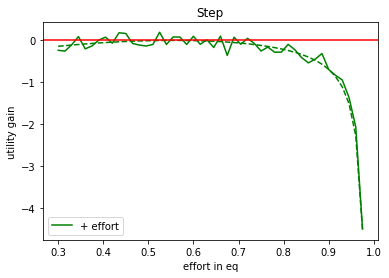

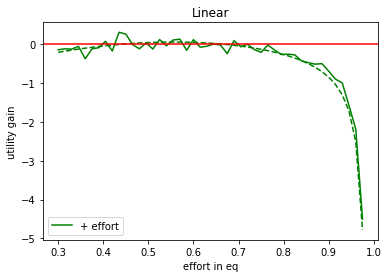

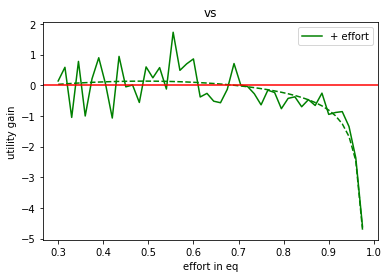

In [143]:
j = 3
k = 0

plt.figure()
index = np.where(np.isnan(Utility_diff_step[:,j,k]) == False)[0]
para = np.polyfit(Efforts[index], Utility_diff_step[index,j,k],2)
plt.plot(Efforts[index], para[0]*np.power(Efforts[index],2)+para[1]*Efforts[index]+para[2] - (c2[index]-c1[index]), 'g--')
plt.plot(Efforts[index], Utility_cost_diff_step[0:-1,j,k], color = 'g', label = '+ effort')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('effort in eq')
plt.ylabel('utility gain')
plt.title('Step')
plt.legend()

plt.figure()
index = np.where(np.isnan(Utility_diff_linear[:,k]) == False)[0]
para = np.polyfit(Efforts[index], Utility_diff_linear[index,k],2)
plt.plot(Efforts[index], para[0]*np.power(Efforts[index],2)+para[1]*Efforts[index]+para[2] - (c2[index]-c1[index]), 'g--')
plt.plot(Efforts[index], Utility_cost_diff_linear[0:-1,k], color = 'g', label = '+ effort')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('effort in eq')
plt.ylabel('utility gain')
plt.title('Linear')
plt.legend()

plt.figure()
index = np.where(np.isnan(Utility_diff_vs[:,k]) == False)[0]
para = np.polyfit(Efforts[index], Utility_diff_vs[index,k],2)
plt.plot(Efforts[index], para[0]*np.power(Efforts[index],2)+para[1]*Efforts[index]+para[2] - (c2[index]-c1[index]), 'g--')
plt.plot(Efforts[index], Utility_cost_diff_vs[0:-1,k], color = 'g', label = '+ effort')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('effort in eq')
plt.ylabel('utility gain')
plt.title('vs')
plt.legend()

In [158]:
from scipy.optimize import fsolve
n = math.ceil(m*n0/(mi - 2))
de = 0.015

Effort_eq_step = np.zeros((len(Thresholds_fraction),5))
Acc_eq_step = np.zeros((len(Thresholds_fraction),5))
flag_step = np.zeros((len(Thresholds_fraction),5))
Effort_eq_linear = np.zeros(5)
Acc_eq_linear = np.zeros(5)
flag_linear = np.zeros(5)
Effort_eq_vs = np.zeros(5)
Acc_eq_vs = np.zeros(5)
flag_vs = np.zeros(5)
for j,t in enumerate(Thresholds_fraction):
    for k in [0,3,4]:
        index = np.where(np.isnan(Utility_diff_step[:,j,k]) == False)[0]
        para = np.polyfit(Efforts[index], Utility_diff_step[index,j,k],2)
        
#         plt.figure()
#         plt.plot(np.arange(0.8,0.99,0.01), para[0]*np.power(np.arange(0.8,0.99,0.01),2)+para[1]*np.arange(0.8,0.99,0.01)+para[2])
#         plt.plot(np.arange(0.8,0.99,0.01), cost_2(np.arange(0.8,0.99,0.01)+de, alpha)-cost_2(np.arange(0.8,0.99,0.01), alpha))
        
        f = lambda t: para[0]*np.power(t,2)+para[1]*t+para[2] - cost_2_derivative(t,alpha)*de
        e0 = fsolve(f, 0.99)[0]
        
        if e0 > 0 and e0 < 1:
            flag_step[j,k] = 1
            Effort_eq_step[j,k] = e0
            if e0 < Efforts[0]:
                i0 = 0
                i1 = 0
            else:
                i0 = np.where(Efforts < e0)[0][-1]
                i1 = np.where(Efforts >= e0)[0][0]
            
            Acc_eq_step[j,k] = ((e0-Efforts[i0])*Acc[i1,k] + (Efforts[i1]-e0)*Acc[i0,k])/(Efforts[i1]-Efforts[i0])

for k in [0,3,4]:
    index = np.where(np.isnan(Utility_diff_linear[:,k]) == False)[0]
    para = np.polyfit(Efforts[index], Utility_diff_linear[index,k],2)
    f = lambda t: para[0]*np.power(t,2)+para[1]*t+para[2] - cost_2_derivative(t,alpha)*de
    e0 = fsolve(f, 0.99)[0]
    if e0 > 0 and e0 < 1:
        flag_linear[k] = 1
        Effort_eq_linear[k] = e0
        i0 = np.where(Efforts < e0)[0][-1]
        i1 = np.where(Efforts >= e0)[0][0]

        Acc_eq_linear[k] = ((e0-Efforts[i0])*Acc[i1,k] + (Efforts[i1]-e0)*Acc[i0,k])/(Efforts[i1]-Efforts[i0])

for k in [0,3,4]:
    index = np.where(np.isnan(Utility_diff_vs[:,k]) == False)[0]
    para = np.polyfit(Efforts[index], Utility_diff_vs[index,k],2)
    f = lambda t: para[0]*np.power(t,2)+para[1]*t+para[2] - cost_2_derivative(t,alpha)*de
    e0 = fsolve(f, 0.99)[0]
    if e0 > 0 and e0 < 1:
        flag_vs[k] = 1
        Effort_eq_vs[k] = e0
        if e0 < Efforts[0]:
            i0 = 0
            i1 = 0
        else:
            i0 = np.where(Efforts < e0)[0][-1]
            i1 = np.where(Efforts >= e0)[0][0]

        Acc_eq_vs[k] = ((e0-Efforts[i0])*Acc[i1,k] + (Efforts[i1]-e0)*Acc[i0,k])/(Efforts[i1]-Efforts[i0])
    
        
print(Acc_eq_step)
print(Acc_eq_linear)
print(Acc_eq_vs,'\n')

print(Effort_eq_step)
print(Effort_eq_linear)
print(Effort_eq_vs)

[[0.94975436 0.         0.         0.95224822 0.8218881 ]
 [0.94149666 0.         0.         0.94435353 0.73378417]
 [0.92993207 0.         0.         0.93224077        nan]
 [0.83978729 0.         0.         0.84607324        nan]
 [0.7713952  0.         0.         0.77279218 0.        ]]
[0.89393442 0.         0.         0.91081697 0.79709018]
[0.9014897  0.         0.         0.90839482 0.7963597 ] 

[[0.87741113 0.         0.         0.89396487 0.59598313]
 [0.83349298 0.         0.         0.84527226 0.41436866]
 [0.78322903 0.         0.         0.78956899 0.24005261]
 [0.55886332 0.         0.         0.56659979 0.11163157]
 [0.44000598 0.         0.         0.43837279 0.        ]]
[0.67317345 0.         0.         0.71636344 0.53967978]
[0.69412243 0.         0.         0.70872421 0.53811847]


In [95]:
print(Effort_eq_step)
print(Effort_eq_linear)
print(Effort_eq_vs)

[[0.7224413  0.         0.         0.71885007 0.61621679]
 [0.39879155 0.         0.         0.36015961 0.58079415]
 [0.09619036 0.         0.         0.         0.53145252]]
[0.30471812 0.         0.         0.46629211 0.80579576]
[0.17118466 0.         0.         0.2766164  0.53870575]


In [ ]:
"""
Plot smoothened curves
"""
plt.figure()
j = 1
k = 3
index = np.where(np.isnan(Utility_diff[:,j,k,1]) == False)[0]
para = np.polyfit(1/(1-Efforts[index]), Utility_diff[index,j,k,1],1)
plt.plot(Efforts[index], para[0]/(1-Efforts[index])+para[1], 'r--')
plt.plot(Efforts, Utility_diff[:,j,k,1],color = 'r', label = '- effort')

index = np.where(np.isnan(Utility_diff[:,j,k,0]) == False)[0]
para = np.polyfit(-1/(1-Efforts[index]), Utility_diff[index,j,k,0],1)
plt.plot(Efforts[0:-2], -para[0]/(1-Efforts[0:-2])+para[1], 'g--')
plt.plot(Efforts, Utility_diff[:,j,k,0],color = 'g', label = '+ effort')

plt.xlabel('effort in eq')
plt.ylabel('utility gain')
plt.legend()


In [ ]:
"""
Finding equilibrium
"""
from scipy.optimize import fsolve

n = math.ceil(m*n0/(mi - 2))

Effort_eq_step = np.zeros((len(Thresholds_fraction),5))
Payment_eq_step = np.zeros((len(Thresholds_fraction),5))
Prob_work_eq_step = np.zeros((len(Thresholds_fraction),5))
flag = np.zeros((len(Thresholds_fraction),5))
for j,t in enumerate(Thresholds_fraction):
    for k in [1,3,4]:
        index = np.where(np.isnan(Utility_diff[:,j,k,1]) == False)[0]
        para = np.polyfit(1/(1-Efforts[index]), Utility_diff[index,j,k,1],1)
        if para[0]+para[1] >=0:
            e1 = 0
        else:
            f = lambda t: para[0]/(1-t)+para[1]
            e1 = fsolve(f, 0.8)[0]
#         plt.figure()
#         plt.plot(Efforts[index], para[0]/(1-Efforts[index])+para[1])
#         plt.plot(Efforts[index], Utility_diff[index,j,k,1],label = '- effort')

        index = np.where(np.isnan(Utility_diff[:,j,k,0]) == False)[0]
        para = np.polyfit(-1/(1-Efforts[index]), Utility_diff[index,j,k,0],1)
        if para[0]+para[1] <=0:
            e0 = 0
        else:
            f = lambda t: -para[0]/(1-t)+para[1]
            e0 = fsolve(f, 0.8)[0]
#         plt.plot(Efforts[0:-2], -para[0]/(1-Efforts[0:-2])+para[1])
#         plt.plot(Efforts[0:-2], Utility_diff[0:-2,4,4,0],label = '- effort')
        if e0 <= e1 and e0 > 0 and e0 < 1 and Acc[j,k,int((e0-Efforts[0])/0.015)] >= Acc_goal:
            flag[j,k] = 1
            Effort_eq_step[j,k] = e0
            i0 = np.where(Efforts < e0)[0][-1]
            i1 = np.where(Efforts >= e0)[0][0]
            p_w = ((e0-Efforts[i0])*Prob_worker[j,k,i1,1] + (Efforts[i1]-e0)*Prob_worker[j,k,i0,1])/(Efforts[i1]-Efforts[i0])
            Prob_work_eq_step[j,k] = p_w
            n_w = ((e0-Efforts[i0])*Num_worker[j,k,i1] + (Efforts[i1]-e0)*Num_worker[j,k,i0])/(Efforts[i1]-Efforts[i0])
#             Payment_eq_step[j,k] = n_w*(cost_2(e0,alpha)-0.1*(1-p_w))/p_w + (n-n_w)*0.1
            Payment_eq_step[j,k] = n_w*cost_2(e0,alpha)/p_w + (n-n_w)*0.1

effort_opt = Efforts[np.where(Acc_opt >= Acc_goal)[0][0]]
Payment_opt = cost_2(effort_opt, alpha)*n*para_w.prior_e[1] + 0.1*n*para_w.prior_e[0]
    
print('Recall','\n', Prob_work_eq_step)
print('\n','Effort','\n', Effort_eq_step)
print('\n','Payment','\n', Payment_eq_step)
print('\n','Optimal effort/payment', effort_opt, Payment_opt)

[[1. 0. 0. 1. 1.]
 [1. 0. 0. 1. 1.]
 [1. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


IndexError: index 1 is out of bounds for axis 0 with size 1

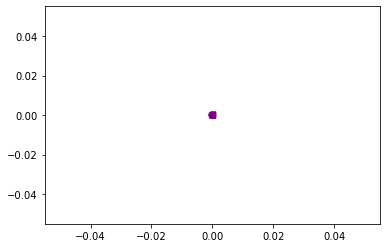

In [53]:
colors = ['gold','goldenrod','darkorange','peru','red','firebrick','purple']
markers = ['o','D','s','<','x','p','h']
MI = ['TVD','KL','Sq','Helg','DMI']
Thresholds = ['10%','20%','30%','40%','50%','60%','70%','80%','90%']
flag = np.zeros((8,5))
flag[np.where(Prob_work_eq_step > 0)] = 1
for i in range(8):
    for k in range(5):
        if flag[i,k] != 0:
            if k == 0:
                plt.scatter(Prob_work_eq_step[i,k], Payment_eq_step[i,k], c = '', edgecolors=colors[i], linewidth=2, marker = markers[k],label=Thresholds[i])
            elif k == 4:
                plt.scatter(Prob_work_eq_step[i,k], Payment_eq_step[i,k], c = colors[i], linewidth=2, marker = markers[k])
            else:
                plt.scatter(Prob_work_eq_step[i,k], Payment_eq_step[i,k], c = '', edgecolors=colors[i], linewidth=2, marker = markers[k])
plt.xlabel('Recall of mechanisms')
plt.ylabel('Payment')
plt.title('mi='+str(mi)+', n0='+str(n0)+', alpha='+str(alpha))
# plt.ylim((0,350))
plt.legend()

effort_opt = Efforts[np.where(Acc_opt >= Acc_goal)[0][0]]
Payment_opt = cost_2(effort_opt, alpha)*n*para_w.prior_e[1] + 0.1*n*para_w.prior_e[0]
plt.axhline(y = Payment_opt, color='b', linestyle='--')